In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

filename = 'Malaysia'

df = pd.read_csv(filename+'_Lockdown_results.csv')
j = df.loc[df['top_1_entity'] == 'quiz']
print(j)

            username        date  \
1715        keciabee  2020-03-24   
1716  lilisurayaaaaa  2020-03-24   
1717        liynhznn  2020-03-24   
1764   mizwan_mahadi  2020-03-23   
1765      yonaqornnn  2020-03-23   

                                                  tweet  sentiment_score  \
1715  This is so funny.\nI spend time on the other s...             -0.1   
1716  Day 6 of #RestrictedMovementOrder  pic.twitter...             -0.1   
1717  This restricted movement order is really takin...             -0.2   
1764  Art from my balcony. Title for this one; FREED...             -0.2   
1765  Thank you  http://nrfh.sa _  for sharing this ...             -0.4   

      sentiment_magnitude                key_feature  key_feature_score  \
1715                  0.7  Restricted Movement Order               -0.3   
1716                  0.8  Restricted Movement Order               -0.3   
1717                  0.8  Restricted Movement Order               -0.3   
1764                  0.7 

In [2]:
df['sentiment_combined'] = df['sentiment_score']*df['sentiment_magnitude']
df['sentiment_score'].astype(str).astype(float)

0       0.5
1       0.4
2       0.2
3       0.4
4      -0.1
       ... 
3657    0.5
3658    NaN
3659    NaN
3660    NaN
3661    NaN
Name: sentiment_score, Length: 3662, dtype: float64

In [3]:
def entity_calculator(score):
    if score > 0.75:
        value =  3
    elif score <= 0.75 and score > 0.25:
        value =  2
    elif score <= 0.25:
        value =  1
    else:
        value = None
    return value

In [4]:
import numpy as np

def clean_entity(entity):
    if pd.notnull(entity):
        if re.search('wfh', entity, re.IGNORECASE):
            entity = 'WFH'
        elif re.search('working from home', entity, re.IGNORECASE):
            entity = 'WFH'
        elif re.search('workingfromhome', entity, re.IGNORECASE):
            entity = 'WFH'
        elif re.search('work', entity, re.IGNORECASE):
            entity = 'WFH'
        elif re.search('lockdown', entity, re.IGNORECASE):
            entity = 'lockdown'
        elif re.search('meeting', entity, re.IGNORECASE):
            entity = 'meeting'
        elif entity == 'thing' or entity == 'lot' or entity == 'lots' or entity == 'way' or entity == 'part' or entity == 'one' or entity == 'ways' or entity == 'some' or entity == 'all' or entity == 'someone' or entity == 'things' or entity == 'lot' or entity == 'something' or entity == 'everything' or entity == 'bit' or entity == 'anything' or entity == 'many' or entity == 'fuck' or entity == 'shit' or entity == 'WTF' or entity == '#WTF' or entity == 'bullshit' or entity == 'M' or entity == 'FYI' or entity == 'idiot' or entity == 'ass' or entity == 'many' or entity == 'more':
            entity = None
        elif re.search('anyone', entity, re.IGNORECASE):
            entity = 'people'
        elif re.search('everyone', entity, re.IGNORECASE):
            entity = 'people'
        elif re.search('order', entity, re.IGNORECASE) or re.search('movement', entity, re.IGNORECASE) or re.search('mco', entity, re.IGNORECASE) or re.search('rmo', entity, re.IGNORECASE):
            entity = 'Movement Control Order'
        elif re.search('covid', entity, re.IGNORECASE) or re.search('virus', entity, re.IGNORECASE):
            entity = 'Covid-19'
        elif re.search('gov', entity, re.IGNORECASE):
            entity = 'Government'
        elif re.search('malaysia', entity, re.IGNORECASE):
            entity = 'Malaysia'
        elif re.search('malaysian', entity, re.IGNORECASE):
            entity = 'Malaysians'
        elif re.search('mum', entity, re.IGNORECASE) or re.search('dad', entity, re.IGNORECASE) or re.search('parent', entity, re.IGNORECASE):
            entity = 'parents'
        elif re.search('@narendramodi', entity, re.IGNORECASE) or re.search('@PMOIndia', entity, re.IGNORECASE):
            entity = '@PMOIndia'    
        elif re.search('airtel', entity, re.IGNORECASE):
            entity = '@airtelindia'    
        elif re.search('@jiocare', entity, re.IGNORECASE) or re.search('@reliancejio', entity, re.IGNORECASE):
            entity = '@jiocare'  
        elif entity == 'tip' or entity == 'tips':
            entity = 'Tips' 
        elif re.search('email', entity, re.IGNORECASE):
            entity = 'email' 
        elif re.search('internet', entity, re.IGNORECASE):
            entity = 'internet'
        elif re.search('thank', entity, re.IGNORECASE):
            entity = 'Thanks'
    return entity

entity = 'hello'
clean_entity(np.nan)

nan

In [5]:
#df = df.loc[df['sentiment_score'] > 0]

df['top_1_entity_score'] = df.apply(lambda x: entity_calculator(x['top_1_entity_score']), axis = 1) #or 1
df['top_2_entity_score'] = df.apply(lambda x: entity_calculator(x['top_2_entity_score']), axis = 1) #or 1
df['top_3_entity_score'] = df.apply(lambda x: entity_calculator(x['top_3_entity_score']), axis = 1) #or 1

df['top_1_entity'] = df.apply(lambda x: clean_entity(x['top_1_entity']), axis = 1) #or 1
df['top_2_entity'] = df.apply(lambda x: clean_entity(x['top_2_entity']), axis = 1) #or 1
df['top_3_entity'] = df.apply(lambda x: clean_entity(x['top_3_entity']), axis = 1) #or 1


group1 = df.groupby('top_1_entity')['top_1_entity_score'].sum()
group1 = group1.sort_values(ascending = [False])

group2 = df.groupby('top_2_entity')['top_2_entity_score'].sum()
group2 = group2.sort_values(ascending = [False])

group3 = df.groupby('top_3_entity')['top_3_entity_score'].sum()
group3 = group3.sort_values(ascending = [False])


wordcloud = pd.concat([group1, group2, group3])
wordcloud = pd.DataFrame({'entity':wordcloud.index, 'value':wordcloud.values})

wordgroup = wordcloud.groupby('entity')['value'].sum().sort_values(ascending = [False])
wordgroup[0:50]
#wordgroup.to_csv(filename+'_wordcloud.csv', index = False, encoding='utf-8')£



entity
WFH                       3149.0
home                       310.0
people                     284.0
lockdown                   218.0
Covid-19                   158.0
office                     128.0
@airtelindia               108.0
internet                   100.0
@PMOIndia                   87.0
companies                   77.0
employees                   65.0
team                        63.0
meeting                     61.0
Sir                         59.0
Government                  57.0
@jiocare                    54.0
Tips                        52.0
company                     47.0
Thanks                      46.0
situation                   45.0
India                       42.0
times                       39.0
parents                     38.0
family                      33.0
most                        33.0
person                      32.0
world                       31.0
@ACTFibernet                31.0
wife                        29.0
People                      29.0
lif

In [6]:
negativesentiment = df.loc[df['sentiment_score'] <0]

negativegroup1 = negativesentiment.groupby('top_1_entity')['top_1_entity_score'].sum().sort_values(ascending = [False])

negativegroup2 = negativesentiment.groupby('top_2_entity')['top_2_entity_score'].sum().sort_values(ascending = [False])

negativegroup3 = negativesentiment.groupby('top_3_entity')['top_3_entity_score'].sum().sort_values(ascending = [False])

negativewordcloud = pd.concat([negativegroup1, negativegroup2, negativegroup3])
negativewordcloud = pd.DataFrame({'entity':negativewordcloud.index, 'value':negativewordcloud.values})

negativewordgroup = negativewordcloud.groupby('entity')['value'].sum().sort_values(ascending = [False])


negativewordgroup
#negativecsv.to_csv(filename + 'negative_wordcloud.csv')


entity
WFH             762.0
@airtelindia     77.0
people           74.0
home             73.0
@PMOIndia        55.0
                ...  
efficiency        1.0
dwellers          1.0
dues              1.0
drink             1.0
#ACTFibernet      1.0
Name: value, Length: 1223, dtype: float64

In [7]:
positivesentiment = df.loc[df['sentiment_score'] >0]

positivegroup1 = positivesentiment.groupby('top_1_entity')['top_1_entity_score'].sum().sort_values(ascending = [False])

positivegroup2 = positivesentiment.groupby('top_2_entity')['top_2_entity_score'].sum().sort_values(ascending = [False])

positivegroup3 = positivesentiment.groupby('top_3_entity')['top_3_entity_score'].sum().sort_values(ascending = [False])

positivewordcloud = pd.concat([positivegroup1, positivegroup2, positivegroup3])
positivewordcloud = pd.DataFrame({'entity':positivewordcloud.index, 'value':positivewordcloud.values})

positivewordgroup = positivewordcloud.groupby('entity')['value'].sum().sort_values(ascending = [False])
positivewordgroup
#positivecsv.to_csv(filename + 'positive_wordcloud.csv')


entity
WFH             1687.0
home             176.0
people           143.0
lockdown          96.0
Covid-19          79.0
                 ...  
discomfort         1.0
dish               1.0
disruptor          1.0
distance           1.0
#AmazonPrime       1.0
Name: value, Length: 2421, dtype: float64

In [8]:
pd.set_option('use_inf_as_na', True)

merged = pd.merge(negativewordgroup, positivewordgroup, on = 'entity', how = 'outer')
merged.fillna(0, inplace=True)
merged['final_value'] = merged['value_y'] - merged['value_x']
merged

,value_x,value_y,final_value
entity,,,
WFH,762.0,1687.0,925.0
@airtelindia,77.0,12.0,-65.0
people,74.0,143.0,69.0
home,73.0,176.0,103.0
@PMOIndia,55.0,18.0,-37.0
...,...,...,...
discomfort,0.0,1.0,1.0
dish,0.0,1.0,1.0
disruptor,0.0,1.0,1.0


In [9]:
negative = merged.loc[merged['final_value'] < 0 ]
negative = negative.sort_values(by = 'final_value',ascending = True)
negativecsv = negative[0:30]
negativecsv['final_value'] = abs(negativecsv['final_value'])
#negativecsv.to_csv(filename + '_negative_wordcloud.csv')
negativecsv

C:\Users\Khai Xi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,value_x,value_y,final_value
entity,,,
@airtelindia,77.0,12.0,65.0
@PMOIndia,55.0,18.0,37.0
internet,54.0,27.0,27.0
@jiocare,34.0,13.0,21.0
Government,27.0,12.0,15.0
@VodafoneIN,15.0,2.0,13.0
office,51.0,41.0,10.0
@ACTFibernet,16.0,6.0,10.0
reason,10.0,1.0,9.0


In [10]:
positive = merged.loc[merged['final_value'] > 0 ]
positive = positive.sort_values(by = 'final_value',ascending = False)
positivecsv = positive[0:30]
#positivecsv.to_csv(filename + '_positive_wordcloud.csv')
positivecsv

,value_x,value_y,final_value
entity,,,
WFH,762.0,1687.0,925.0
home,73.0,176.0,103.0
people,74.0,143.0,69.0
Covid-19,28.0,79.0,51.0
lockdown,49.0,96.0,47.0
meeting,7.0,45.0,38.0
Tips,5.0,42.0,37.0
Thanks,3.0,35.0,32.0
team,11.0,39.0,28.0


In [11]:
import re

txt = "The rain in Spain is me"
x = re.search("ain", txt)

x.group()

'ain'

In [12]:
daybyday = df[['date','Country', 'sentiment_score', 'sentiment_magnitude', 'key_feature', 'key_feature_score', 'key_feature_salience', 'key_feature_magnitude']]

daybydaysentiment = df[['date','Country', 'sentiment_score', 'sentiment_magnitude']]
daybydaysentiment = daybydaysentiment.groupby(['date', 'Country'])['sentiment_score', 'sentiment_magnitude'].mean().reset_index()

daybydaysentiment

C:\Users\Khai Xi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,date,Country,sentiment_score,sentiment_magnitude
0,2020-03-18,IN,0.063063,0.702703
1,2020-03-19,IN,-0.008095,0.779048
2,2020-03-20,IN,0.040441,0.829412
3,2020-03-22,IN,0.084266,0.840559
4,2020-03-23,IN,0.091827,0.901442
5,2020-03-24,IN,0.104472,0.788211
6,2020-03-25,IN,0.050472,0.883019
7,2020-03-26,IN,0.130000,0.902857
8,2020-03-27,IN,0.103070,0.810965
9,2020-03-29,IN,0.123239,0.835211


C:\Users\Khai Xi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


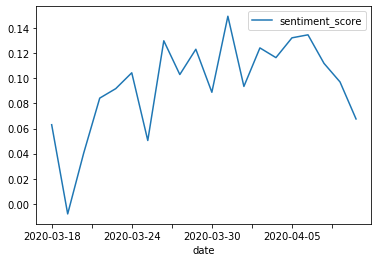

In [13]:
daybyday = df[['date', 'sentiment_score', 'sentiment_magnitude', 'key_feature', 'key_feature_score', 'key_feature_salience', 'key_feature_magnitude']]

daybydaysentiment = df[['date', 'sentiment_score', 'sentiment_magnitude', 'sentiment_combined']]
daybydaysentiment = daybydaysentiment.groupby(['date'])['sentiment_score', 'sentiment_magnitude', 'sentiment_combined'].mean().reset_index()

pd.options.display.float_format = '{:.2f}'.format

daybydaysentiment.plot('date', 'sentiment_score')

In [14]:
df['key_feature'] = df.apply(lambda x: clean_entity(x['key_feature']), axis = 1) #or 1
df['key_feature_combined'] = df['key_feature_score'] * df['key_feature_magnitude']

df.key_feature.value_counts()

WFH         2501
lockdown      92
Name: key_feature, dtype: int64

In [15]:

wfh_group = df.groupby(['date','key_feature'])['key_feature_score', 'key_feature_magnitude', 'key_feature_combined'].mean().reset_index()
wfhentitydf = wfh_group.loc[wfh_group['key_feature'] == 'WFH']

C:\Users\Khai Xi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [16]:
lockdown_group = df.groupby(['date','key_feature'])['key_feature_score', 'key_feature_magnitude', 'key_feature_combined'].mean().reset_index()
lockdownentitydf = lockdown_group.loc[lockdown_group['key_feature'] == 'lockdown']

C:\Users\Khai Xi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [17]:
data = pd.merge(wfhentitydf, daybydaysentiment, on = 'date', how = 'inner')


In [18]:
data = pd.merge(data, lockdownentitydf, on = 'date', how = 'inner')


In [19]:
data

,date,key_feature_x,key_feature_score_x,key_feature_magnitude_x,key_feature_combined_x,sentiment_score,sentiment_magnitude,sentiment_combined,key_feature_y,key_feature_score_y,key_feature_magnitude_y,key_feature_combined_y
0,2020-03-18,WFH,-0.01,0.22,-0.04,0.06,0.70,0.06,lockdown,-0.40,0.40,-0.16
1,2020-03-19,WFH,0.01,0.19,0.00,-0.01,0.78,-0.00,lockdown,0.00,0.00,0.00
2,2020-03-22,WFH,0.01,0.19,0.01,0.08,0.84,0.10,lockdown,0.00,0.17,0.00
3,2020-03-23,WFH,-0.01,0.21,-0.02,0.09,0.90,0.11,lockdown,-0.18,0.22,-0.09
4,2020-03-24,WFH,-0.02,0.19,-0.02,0.10,0.79,0.11,lockdown,0.13,0.27,0.05
5,2020-03-25,WFH,0.03,0.22,-0.00,0.05,0.88,0.06,lockdown,-0.02,0.06,-0.00
6,2020-03-26,WFH,-0.01,0.23,-0.03,0.13,0.90,0.15,lockdown,0.04,0.23,0.03
7,2020-03-27,WFH,0.03,0.22,0.02,0.10,0.81,0.10,lockdown,-0.03,0.23,-0.04
8,2020-03-29,WFH,-0.00,0.19,-0.01,0.12,0.84,0.11,lockdown,0.17,0.27,0.12
9,2020-03-30,WFH,0.01,0.20,-0.02,0.09,0.85,0.09,lockdown,0.13,0.15,0.04


In [22]:
x = data['date'].values[2:]
y1 = data['sentiment_combined'].values[2:]
y2 = data['key_feature_combined_x'].values[2:]
y3 = data['key_feature_combined_y'].values[2:]

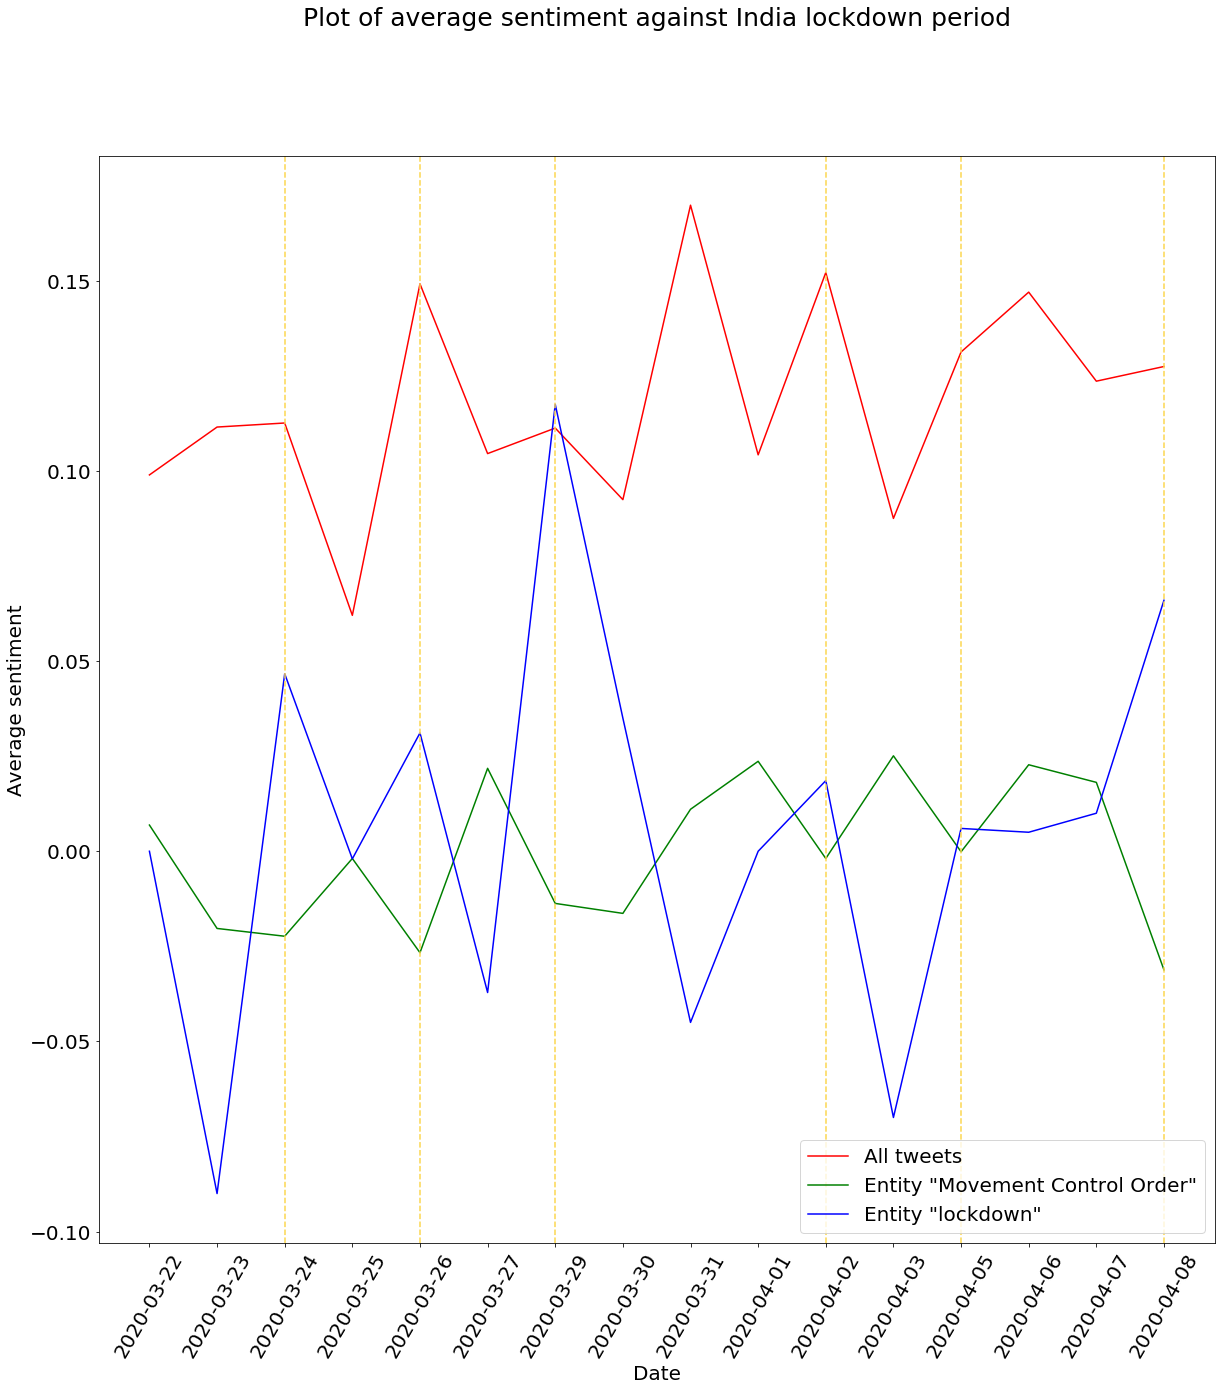

In [25]:
plt.figure(figsize=(20,20))
plt.plot(x, y1, 'r', label = 'All tweets')
plt.plot(x, y2, 'g', label = 'Entity "Movement Control Order"')
plt.plot(x, y3, 'b', label = 'Entity "lockdown"')
plt.xticks(rotation=60, size = 20)
plt.yticks(size = 20)
plt.xlabel('Date', size = 20)
plt.ylabel('Average sentiment', size = 20)
plt.axvline(x = '2020-03-24', linestyle = '--', color = '#FCD64F')
plt.axvline(x = '2020-03-26', linestyle = '--', color = '#FCD64F')
plt.axvline(x = '2020-03-29', linestyle = '--', color = '#FCD64F')
plt.axvline(x = '2020-04-02', linestyle = '--', color = '#FCD64F')
plt.axvline(x = '2020-04-05', linestyle = '--', color = '#FCD64F')
plt.axvline(x = '2020-04-08', linestyle = '--', color = '#FCD64F')
plt.legend(loc = 'lower right', prop={'size': 20})
plt.title("Plot of average sentiment against "+filename+" lockdown period", size = 25, pad = 130)



plt.savefig(filename + '_plot.png')
plt.show()

In [95]:
plt.savefig(filename + '_plot.png')
plt.show()

<Figure size 432x288 with 0 Axes>